Importing Neccesary Libraries

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

Setting Up WebDriver and URLS for Scraping

In [2]:
URLS = []
count = int(input("How many stocks would you like data for?"))

for i in range(count):
    z = input("Enter the abberviation at the end of the yahoo finance URL: ")
    URLS.append("https://finance.yahoo.com/quote/"+z)
    

data = []

How many stocks would you like data for? 4
Enter the abberviation at the end of the yahoo finance URL:  NFLX
Enter the abberviation at the end of the yahoo finance URL:  NVDA
Enter the abberviation at the end of the yahoo finance URL:  SMCI
Enter the abberviation at the end of the yahoo finance URL:  AAPL


Iterating Through Each URL In Order to Find Data

In [3]:
driver = webdriver.Firefox()
for i in URLS:
    driver.get(i)
    stockNameElement = driver.find_element(By.XPATH,'/html/body/div[1]/main/section/section/section/article/section[1]/div[1]/div')
    stockPriceElement = driver.find_element(By.XPATH, '/html/body/div[1]/main/section/section/section/article/section[1]/div[2]/div[1]/section/div/section[1]/div[1]')
    stockNameText = stockNameElement.text
    stockPriceText = stockPriceElement.text
    stockPrice = stockPriceText.split()[0]
    stockPriceNumericalChange = stockPriceText.split()[1]
    stockPricePercentChange = stockPriceText.split()[2]
    x = [stockNameText,stockPrice,stockPriceNumericalChange,stockPricePercentChange]
    data.append(x)
driver.quit()
print(data)


The geckodriver version (0.33.0) detected in PATH at c:\Users\tvshe\Downloads\webdrivers\geckodriver-v0.33.0-win64\geckodriver.exe might not be compatible with the detected firefox version (125.0.1.8872); currently, geckodriver 0.34.0 is recommended for firefox 125.*, so it is advised to delete the driver in PATH and retry


[['Netflix, Inc. (NFLX)\nFollow', '556.76', '-53.80', '(-8.81%)'], ['NVIDIA Corporation (NVDA)\nFollow', '807.71', '-39.00', '(-4.61%)'], ['Super Micro Computer, Inc. (SMCI)\nFollow', '761.62', '-166.86', '(-17.97%)'], ['Apple Inc. (AAPL)\nFollow', '164.32', '-2.72', '(-1.63%)']]


Turning Data into DataFrame and Cleaning Up in Order for Plot Usage

In [4]:
dataColumns = ["Company", "Price","Numerical_Change","Percentage_Change"]
df = pd.DataFrame(data,columns = dataColumns)
df["Price"] = pd.to_numeric(df["Price"])
clean_df = df.replace("\nFollow","",regex=True)
clean_df = clean_df.set_index("Company")
print(clean_df)

                                    Price Numerical_Change Percentage_Change
Company                                                                     
Netflix, Inc. (NFLX)               556.76           -53.80          (-8.81%)
NVIDIA Corporation (NVDA)          807.71           -39.00          (-4.61%)
Super Micro Computer, Inc. (SMCI)  761.62          -166.86         (-17.97%)
Apple Inc. (AAPL)                  164.32            -2.72          (-1.63%)


Creating a Bar Graph Out of Scraped Data

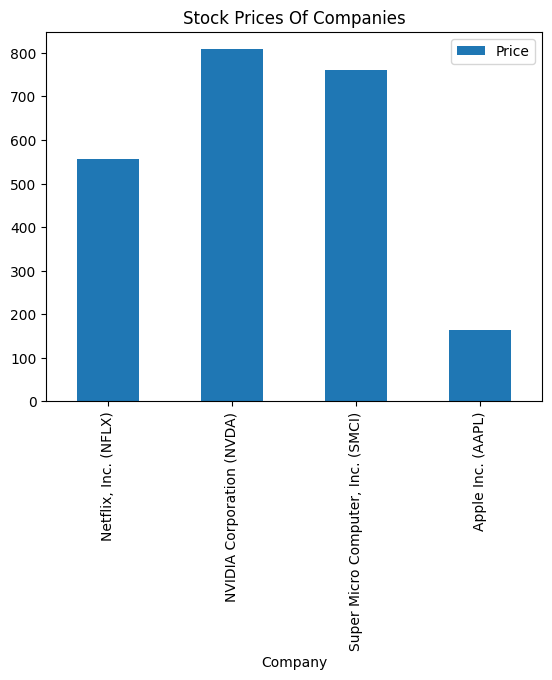

In [5]:

plot = clean_df.plot(kind = "bar", title="Stock Prices Of Companies",)